<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/datasets/kv-anlagen/da_kvanlagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beschreibung Datensatz

Die Kehrichtverbrennung ist die Verbrennung der atmosphärisch brennbaren Anteile von Abfall zum Zwecke der Volumenreduzierung des Abfalls unter Nutzung der enthaltenen Energie.Der schweizerische KVA-Park umfasst im Jahr 2017 30 Anlagen mit Kapazitäten zwischen 30‘000 und 230‘000 Jahrestonnen. Die Gesamtmenge an brennbaren Abfällen aus der Schweiz und dem Ausland, die in KVA thermisch verwertet werden, beläuft sich auf ca. 4 Mio. Tonnen. Die bei der Verbrennung anfallende Wärme wird für die Produktion von Strom oder für den Betrieb von Fernwärmenetzen bzw. für Prozesswärme für Industrieanlagen eingesetzt. Im Jahr 2017 produzierten die 30 KVA eine bisherige Rekordmenge an Energie von gesamthaft 4'036 Gigawattstunden (GWh) Wärme und 2338 GWh Strom. Sie tragen damit rund 2.5 Prozent zur Deckung des schweizerischen Gesamtenergiebedarfs bzw. knapp 4 Prozent zur schweizerischen Stromproduktion bei. Die Geofachdaten KVA dokumentieren den aktuellen Stand verwerteter Abfallmengen und der nach aussen gelieferten Energiemengen. Sämtliche Informationen basieren auf den Auskünften der Anlagenbetreibenden. Die Angaben dienen als Informationsmaterial für die Öffentlichkeit und stellen keine amtliche Auskunft oder rechtsverbindliche Aussage dar.

Quelle: [opendata.swiss](https://opendata.swiss/de/dataset/kehrichtverbrennungsanlagen-kva)

Weiterführende Informationen ([PDF](https://github.com/sakuronohana/my_datascience/blob/master/datasets/kv-anlagen/9701-Modelldokumentation_MGDM_Kehrichtverbrennungsanlagen_DE_V1_0_PDF.pdf))

In [ ]:
!pip install geopandas

In [32]:
# Load python libraries

import pandas as pd
import numpy as np
import seaborn as sns
# import geopandas as gpd


In [33]:
# Load datas

datloc_el = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/Electricity.csv'
datloc_ht = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/Heat.csv'
datloc_rw = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/RecycledWaste.csv'
datloc_wip = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/WasteIncinerationPlant.csv'

kv_electricity = pd.read_csv(datloc_el) # Durch KV produzierter Strom
kv_heat = pd.read_csv(datloc_ht) # Durch KV produzierte Wärme
kv_recywaste = pd.read_csv(datloc_rw) # Durch KV verbrante Abfallmenge
kv_wasteincplant = pd.read_csv(datloc_wip, encoding='latin1') # Informationen zu Kehrichtverbrennugsanlagen

In [ ]:
# Sample of determining the Values of a Dataset
kv_electricity.info()

In [3]:
# Datentype von float auf int64 ändern
kv_electricity['2018'] =  kv_electricity['2018'].astype('int64')
kv_electricity['2019'] =  kv_electricity['2019'].astype('int64')
kv_heat['2018'] =  kv_heat['2018'].astype('int64')
kv_heat['2019'] =  kv_heat['2019'].astype('int64')
kv_recywaste['2017'] =  kv_recywaste['2017'].astype('int64')
kv_recywaste['2018'] =  kv_recywaste['2018'].astype('int64')
kv_recywaste['2019'] =  kv_recywaste['2019'].astype('int64')

In [43]:
# Show Basic Statistics Electricity Production
kv_electricity.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,45551.633333,46567.566667,49057.233333,51795.200000,55275.233333,57182.333333,61506.333333,61748.033333,61019.729848,61845.280216
std,28655.553064,28997.873496,31563.700279,34142.826413,34779.440771,33928.672938,38197.343047,37912.767479,37524.023360,37577.868671
min,0.000000,0.000000,0.000000,0.000000,0.000000,671.000000,426.000000,847.000000,651.000000,907.000000
25%,25291.750000,26366.000000,21500.500000,23473.750000,25063.250000,27102.250000,33017.500000,33330.000000,32632.000000,33153.970924
50%,42718.500000,43676.000000,45938.500000,46230.000000,52597.500000,58790.500000,59277.000000,59573.500000,57716.628330,59091.900000
75%,67155.000000,64120.500000,66720.500000,76324.500000,82235.750000,81949.500000,82195.500000,86105.500000,81882.750000,75007.526250
max,97638.000000,101842.000000,112786.000000,132666.000000,136451.000000,134900.000000,149511.000000,151555.000000,164449.440000,155779.200000


In [48]:
# Find the max. Value 
print(kv_electricity[kv_electricity['2018'] == kv_electricity['2018'].max()])

# Find the min. Value
print(kv_electricity[kv_electricity['2018'] == kv_electricity['2018'].min()])


      Name    id  2010  2011  2012  ...    2015    2016    2017       2018      2019
11  Perlen  LU_2     0     0     0  ...  100658  149511  151555  164449.44  155779.2

[1 rows x 12 columns]
      Name    id  2010  2011  2012  2013  2014  2015  2016  2017   2018   2019
21  Gamsen  VS_1   509   510   534   511   426   671   426   847  651.0  907.0


In [49]:
# Transpose of a Matrix 
kv_elect_transp = pd.DataFrame(kv_electricity.select_dtypes(include=['int64']).transpose())
kv_elect_transp.columns = kv_electricity['Name']
kv_elect_transp

Name,Buchs (AG),Oftringen,Turgi,Bern,Biel,Thun,Basel,Posieux,Genf,Niederurnen,Trimmis,Perlen,Colombier,La Chaux-de-Fonds,Bazenheid,Buchs (SG),St. Gallen,Zuchwil,Weinfelden,Giubiasco,Lausanne,Gamsen,Sion,Monthey,Dietikon,Hinwil,Horgen,ZH Hagenholz,ZH Josefstrasse,Winterthur
2010,45221,46166,68338,18795,15000,70199,28820,52000,93658,63606,39851,0,27079,18358,9000,87704,24696,40216,31350,97638,55773,509,27212,80182,47919,89089,18131,88691,49763,31585
2011,47105,46181,69023,23339,17761,69391,41171,55166,98601,58860,50254,0,27861,18309,9643,88895,26438,39341,39133,101842,65874,510,26342,50576,50675,98781,19382,92843,32098,31632
2012,45046,46821,68877,20000,16969,67576,45056,45056,102283,62616,47901,0,26002,16903,10853,84143,18574,50144,39527,106718,63624,534,26529,112786,49832,99645,19033,82187,32328,64154
2013,42011,45906,67293,46554,14750,72534,44408,53915,84382,60223,42593,0,22558,16900,8075,77588,23113,132666,38127,102212,46922,511,24556,97010,50627,102441,18862,96570,31413,89136
2014,64247,46689,66822,45198,14326,73262,55193,53956,88665,63826,49191,0,24766,18942,21381,85227,20869,136451,40176,98235,52101,426,25955,111816,53094,102341,20463,101598,33837,89204
2015,64431,21865,63914,60519,15629,71084,59158,55504,82198,62224,45817,100658,25500,15111,36289,81204,18232,134900,39873,103862,58423,671,23055,86413,51773,91368,8839,95197,31909,109850
2016,68333,46242,63679,73081,14583,73291,47708,45785,80646,64327,44649,149511,18325,15636,40039,82712,18981,124869,43513,105845,63037,426,23864,113888,55517,110190,12603,104570,30677,108663
2017,64348,45827,64470,72863,15438,64382,54964,54781,88151,64183,46295,151555,11899,15549,41019,79969,18095,123748,41327,103597,70548,847,23314,107423,53305,112274,18954,104002,30767,108547


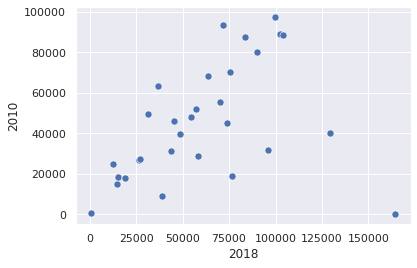

In [95]:
sns.set()
sns.scatterplot(
    data = kv_electricity,
    x = '2018', 
    y = '2010', 
    s=50,
    )